# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, непрерывный по времени.

**Дискретный сигнал** — это сигнал, дискретный по времени и непрерывный по состоянию.

**Цифровой сигнал** — это сигнал, дискретный и по времени, и по состоянию.

**Линейная комбинация** — это выражение, построенное на множестве элементов путём умножения каждого элемента на коэффициенты с последующим сложением результатов.

**Среднее значение дискретного сигнала**: $M = \frac{\sum_{k=0}^{N}x(k)}{N}$.

**Энергия дискретного сигнала**: $E = \sum_{k=0}^{N}|x(k)|^2$.

**Средняя мощность дискретного сигнала**: $P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$.

**Огибающая сигнала** — это функция, описывающая изменения амплитуды сигнала во времени.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы



| Переменная | Назначение | Значение | Идентификатор |
|---|---|---------------------------------------------------------------------------------------|---------------|
| $N_{\text {бр }}$ | Номер бригады | $N_{\text {бр }}=10$ | Nb |
| $N$ | Длина последовательности | $N=30+N_{\text {бp }} \bmod 5=30$ | N |
| $a$ | Основание экспоненты | $a=(-1)^{N_{\text {бр }}}\left(0.8+0.005\left(N_{\text {бр }} \bmod 20\right)\right)=0.85$ | a =  |
| $C$ | Амплитуда гармонического сигнала | $C=1+N_{бр} \bmod 5=1$ | c |
| $\hat{\omega}_0$ (рад) | Частота гармонического сигнала | $\hat{\omega}_0=\pi /\left(6+N_{\text {бр }} \bmod 5\right)\approx0.52$                          | w0            |
| $U$ | Амплитуда импульса | $U=N_{\text {бр }}$ | U=10 |
| $n_0$ | Начальный момент импульса | $n_0=3+N_{\text {бр }} \bmod 5=3$ | n0 |
| $n_{i m p}$ | Длина импульса | $n_{i m p}=5+N_{\text {бр }} \bmod 5=5$ | n_imp |
| $B_1$ | Амплитуды гармонических сигналов | $B_1=1.5+N_{\text {бр }} \bmod 5=1.5$ | B1 |
| $B_2$ |  | $B_2=5.7-N_{\text {бр }} \bmod 5=5.7$ | B2 |
| $B_3$ |  | $B_3=2.2+N_{\text {бр }} \bmod 5=2.2$ | B3 |
| $\hat{\omega}_1$ | Частоты гармонических сигналов | $\hat{\omega}_1=\pi /\left(4+N_{\text {бp }} \bmod 5\right)\approx0.78$ | w1 |
| $\hat{\omega}_2$ |  | $\hat{\omega}_2=\pi /\left(8+N_{\text {бр }} \bmod 5\right)\approx0.39$ | w2 |
| $\hat{\omega}_3$ |  | $\hat{\omega}_3=\pi /\left(16+N_{бр} \bmod 5\right)\approx0.19$ | w3 |
| $a_1$ | Коэффиициенты линейной комбинации гармонических сигналов | $a_1=1.5-N_{\text {бр }} \bmod 5=1.5$ | a1 |
| $a_2$ |  | $a_2=0.7+N_{\text {бр }} \bmod 5=0.7$ | a2 |
| $a_3$ |  | $a_3=1.4+N_{бp} \bmod 5=1.4$ | a3 |

Для начала были импортированы необходимые библиотеки и определены переменные из условия.

In [201]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 10
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
c = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

**Задание 1**

Требуется смоделировать дискретный прямоугольный импульс:

$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

на интервале времени $n \in [0, N-1]$.

Прямоугольный импульс можно представить как линейную комбинацию двух задержанных дискретных единичных скачков $\sigma_d(k)$ с амплитудами равными по модулю и разными по знаку:

$$s_1(k)= U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$

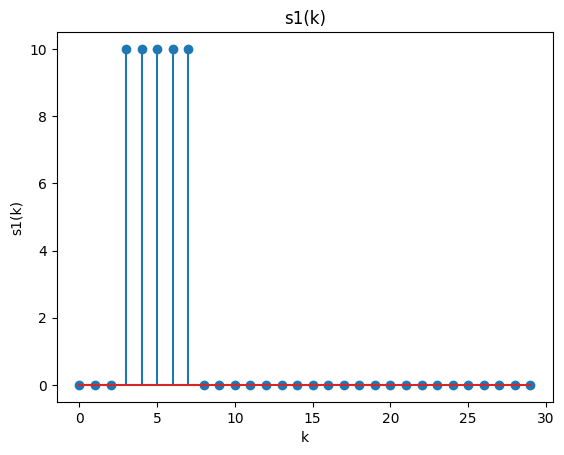

In [202]:
sigma_d = lambda k: np.where(k>=0, 1, 0)
s1 = lambda k: U*(sigma_d(k-n0)-sigma_d(k-n0-n_imp))

k = np.arange(N)

plt.stem(k, s1(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('s1(k)')
plt.title('s1(k)')
plt.show()


**Задание 2**

Требуется смоделировать линейную комбинацию дискретных гармонических сигналов:

$$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

$$x_i(k)=B_i\sin(\hatω_ik), \quad  i = 1, 2, 3$$

на интервале времени $n \in [0, 5N-1]$.

Для получения результирующего сигнала, необходимо в каждом отсчёте определять величины состовляющих гармонических сигналов на данном отсчёте, умножать на заданные для них коэфициенты и складывать их.

Для смоделированного сигнала можно определить некоторые характеристики: среднее значение дискретного сигнала определяют как среднее от значений отсётов на заданном промежутке, энергию определяют как сумму квадратов значений отсчётов на заданном промежутке, а среднюю мощность определяют как среднее от квадратов значений отсчётов на заданном промежутке.

mean_s2: 0.28396041266583466
E: 2231.4741570344095
P: 14.876494380229396


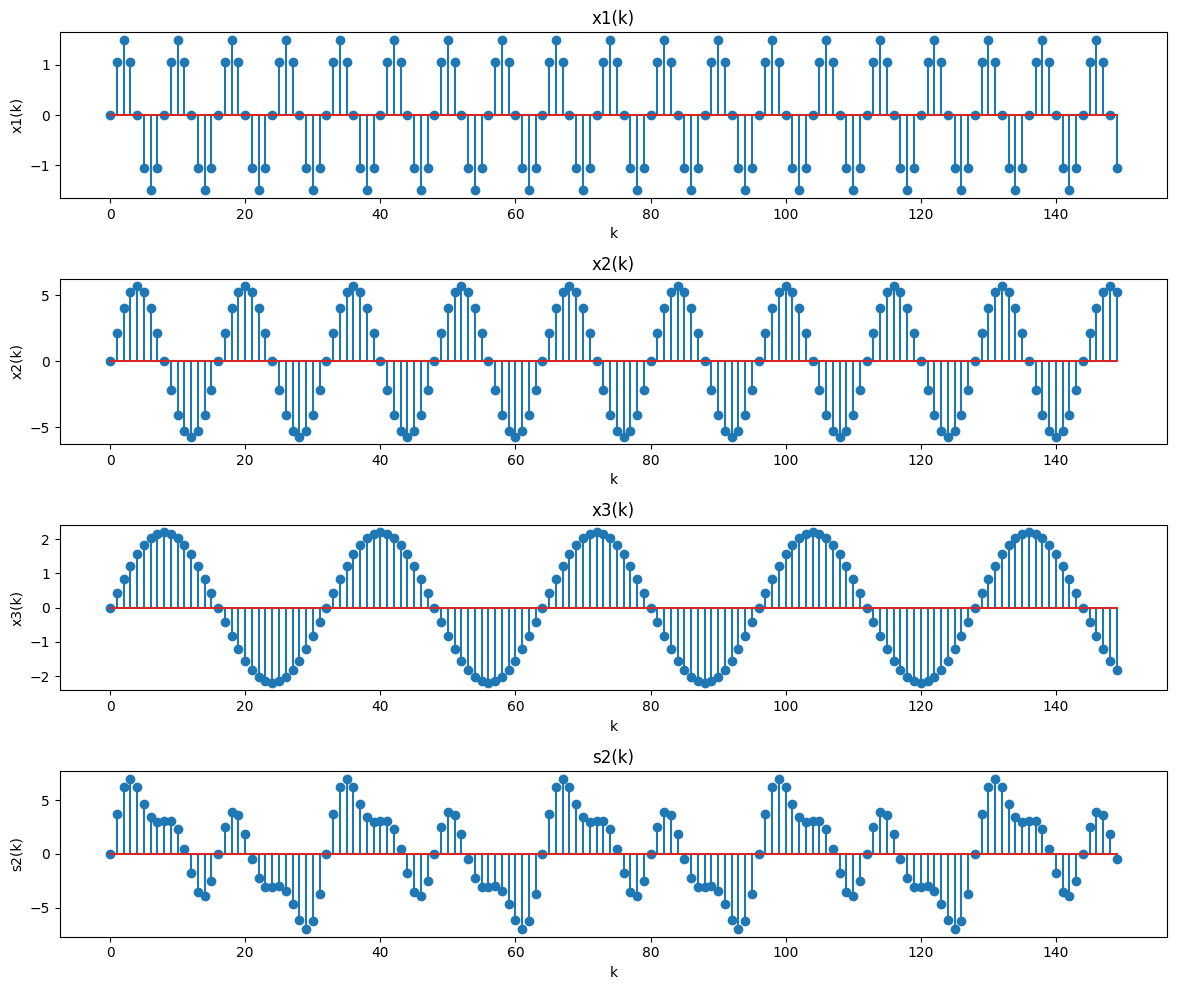

In [203]:
x1 = lambda k: B1 * np.sin(w1 * k)
x2 = lambda k: B2 * np.sin(w2 * k)
x3 = lambda k: B3 * np.sin(w3 * k)
s2 = lambda k: a1*x1(k) + a2*x2(k) + a3*x3(k)

k = np.arange(5*N)

mean_s2 = np.mean(s2(k))
E = np.sum(s2(k)**2)
P = E / len(s2(k))
print("mean_s2:", mean_s2)
print("E:", E)
print("P:", P)

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.stem(k, x1(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x1(k)')
plt.title('x1(k)')

plt.subplot(4, 1, 2)
plt.stem(k, x2(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x2(k)')
plt.title('x2(k)')

plt.subplot(4, 1, 3)
plt.stem(k, x3(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x3(k)')
plt.title('x3(k)')

plt.subplot(4, 1, 4)
plt.stem(k, s2(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('s2(k)')
plt.title('s2(k)')

plt.tight_layout()
plt.show()


**Задание 3**

Требуется смоделировать дискретный сигнал $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$

$$s(k)=C\cos(\hatω_0k)$$

с экспоненциальной огибающей $|a|^k$ на интервале времени $n \in [0, N-1]$.

Для получения результирующего сигнала, необходимо представить его как произведение дискретного гармонического сигнала $s(k)$ на дискретную экспоненциальную функцию $|a|^k$, то есть:

$$s_3(k)=C\cos(\hatω_0k)*|a|^k$$

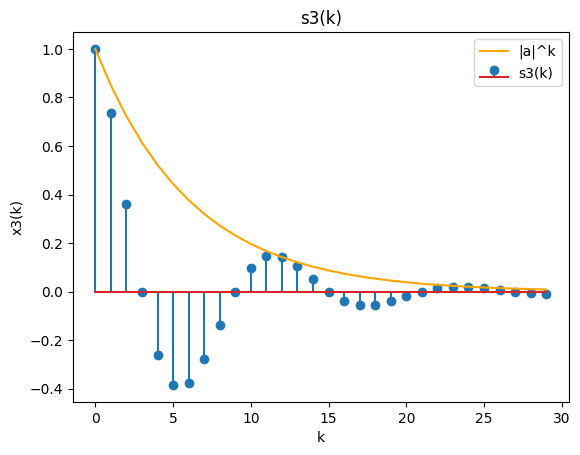

In [204]:
s = lambda k: c * np.cos(w0 * k)
s3 = lambda k: s(k) * np.abs(a)**k

k = np.arange(N)

plt.figure()
plt.stem(k, s3(k), use_line_collection=True, label="s3(k)")
plt.plot(np.abs(a)**k, color="orange", label="|a|^k")
plt.xlabel('k')
plt.ylabel('s3(k)')
plt.title('s3(k)')
plt.legend()
plt.show()

**Задание 4**

Требуется смоделировать пять периодов дискретного сигнала $s_4(k)$, представляющего собой периодическую последовательность прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом $p$, вдвое большим длительности импульса.

$$s(k)=C\cos(\hatω_0k)$$

Для получения результирующего сигнала, необходимо просуммировать прямоугольные импульсы $s_1(k)$ c задержкой в величину периода $p$, умноженного на порядковый номер импульса:

$$ s_4(k)=\sum_{i=0}^{N} s_1(k-ip),$$

где $N$ - количество периодов, $p=2n_{imp}$ - величина периода.


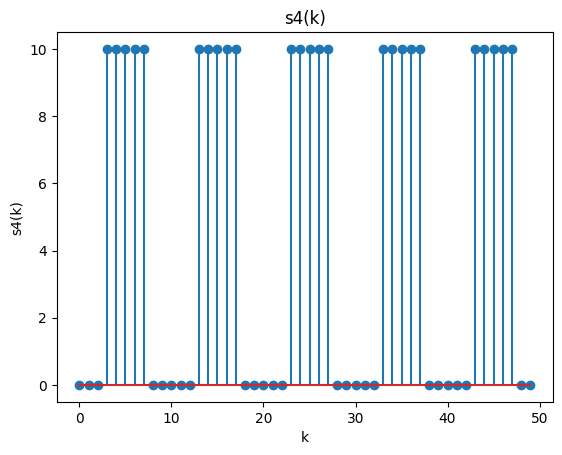

In [205]:
s4 = lambda k, n, p: sum([s1(k-i*p) for i in range(n)])

p = 2 * n_imp
k = np.arange(5*p)

plt.stem(k, s4(k, 5, p), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('s4(k)')
plt.title('s4(k)')
plt.show()

## Выводы

В результате выполнения практической работы было изучено математическое описание линейных комбинаций сигналов. С помощью програмных средств были смоделированы сигналы, представляющие собой линейные комбинации дискретных единичных скачков, дискретных гармонических сигналов и дискретных экспоненциальных функций. Сигналы, из которых строится линейная комбинация, влияют на форму результирующего сигнала, а линейные коэфициенты  определяют изменение амплитуд этих сигналов. В качестве коэфициентов можно использовать другие сигналы, например определя тем самым огибающие. Также можно использовать линейные комбинации для построения периодических сигналов, при этом в качестве элементов будет выступать один сигнал с разной задержкой. В процессе выполнения работы были также определены такие характеристики сигналов как среднее значение, энергия и средняя мощность сигнала.